In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Paso 1: Cargar datos y seleccionar estadísticas clave
data = pd.read_csv("conjunto_entrenamiento.csv")
# Supongamos que las cinco estadísticas clave son 'Min', 'Goals', 'Shots', 'Assists', 'Tkl'
stats = ['PasTotCmp%', 'Goals', 'Shots', 'Assists', 'ScaDrib', 'TklWon', 'GcaDrib', 'Int', 'PasTotCmp', 'AerWon']
X = data[stats]

# Paso 2: Normalización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 3: Entrenamiento del modelo de clustering
k = 5  # Número de clústeres
kmeans = KMeans(n_clusters=k)
# KMeans(n_clusters=k): Crea un objeto KMeans para agrupar datos en k grupos
#   - n_clusters: El número de grupos a generar
# Otros hiperparámetros importantes:
#   - init: Método de inicialización de centroides (default='k-means++')
#   - n_init: Número de veces que se ejecutará el algoritmo con diferentes centroides iniciales (default=10)
#   - max_iter: Número máximo de iteraciones para cada ejecución (default=300)
#   - tol: Tolerancia para declarar convergencia (default=1e-4)
#   - random_state: Semilla utilizada por el generador de números aleatorios (default=None)

kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_

def find_similar_players(player_name):
    player_cluster = data[data['Player'] == player_name]['Cluster'].values[0]
    similar_players = data[data['Cluster'] == player_cluster]['Player'].tolist()
    return similar_players

similar_players = find_similar_players("Cristiano Ronaldo")
print("Jugadores similares:", similar_players)




Coeficiente de Silueta: 0.7212131808445048
Porcentaje de acierto estimado: 86.06065904222524


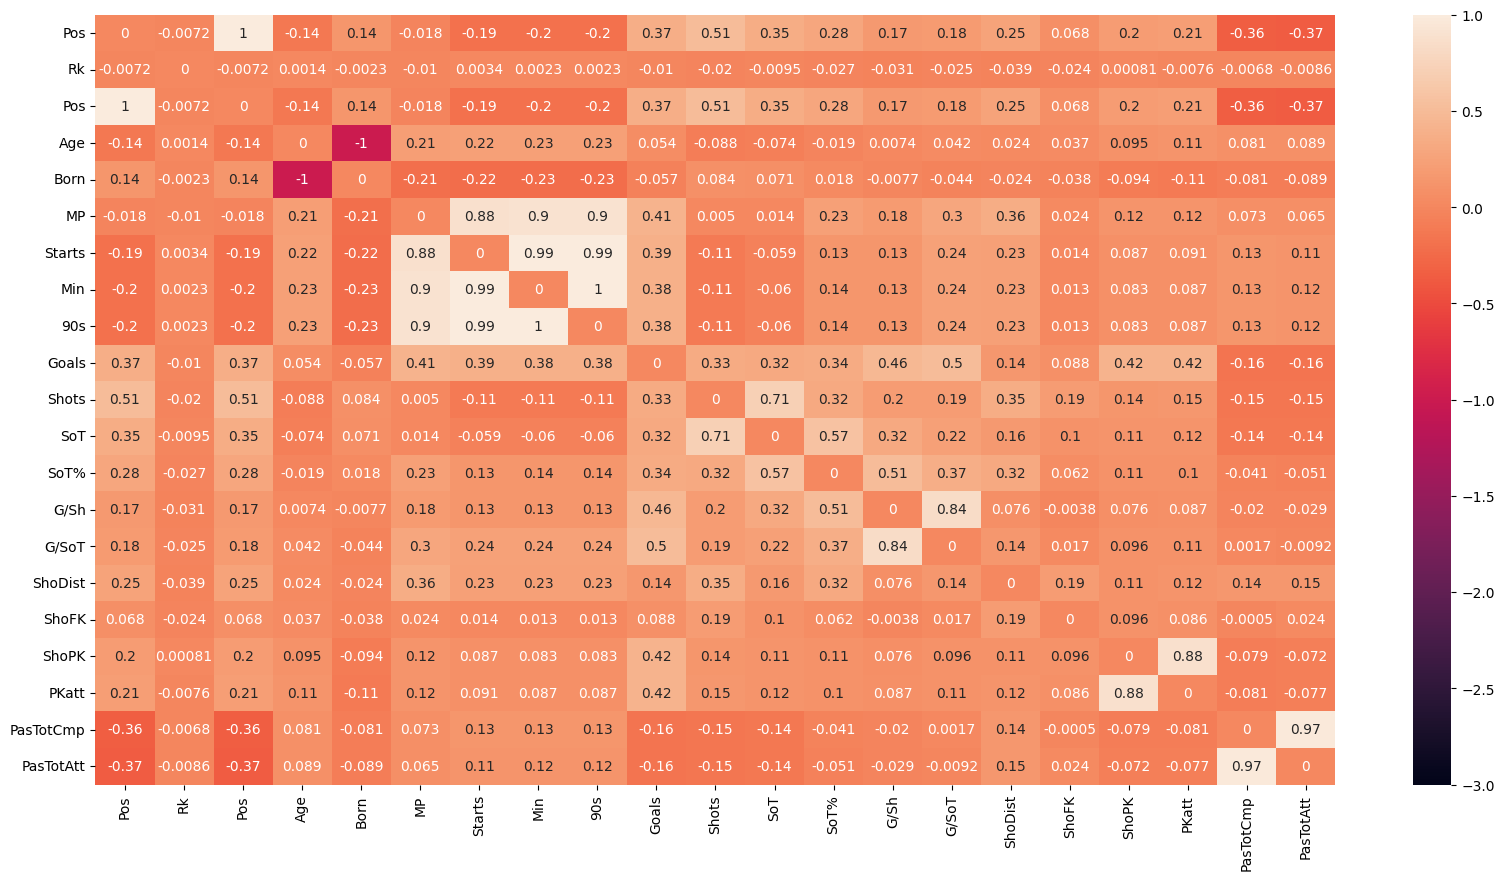

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
datos = pd.read_csv("22-23FPS_actualizado.csv", encoding="latin1", sep=";")

# crear un mapa de calor, el csv contiene muchos datos que son cadenas asi que solo se tomaran en cuenta los datos numericos
datos_numericos = datos.select_dtypes(include=['number'])

# seleccionar siempre la primera columna y las columnas del 25 al 50
atributo = 1

columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(0, 20))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(10, 20))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(20, 30))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(30, 40))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(40, 50))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(50, 60))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(60, 70))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(70, 80))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(80, 90))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(90, 100))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(100, 110))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(110, 120))]

# Calcular la correlación
correlaciones = columnas_numericas.corr()
np.fill_diagonal(correlaciones.values, 0)

# Crear el mapa de calor
plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura
sns.heatmap(correlaciones, annot=True, vmin=-3, vmax=1)

plt.show()
